In [1]:
from models.fusion_network import get_fusion_net
from tensorflow.keras.utils import plot_model
from keras.callbacks import TensorBoard
import os
from DataLoader import Data_loader
import re
import random


In [2]:
dataset_path = "C:/Users/mar-z/progetti/data/SynthOutdoor/images"
seed = 101 # seed for reproducibility of random split

### Preprocess dataset

In [3]:

train_dir = os.path.join(dataset_path, "train")
val_dir = os.path.join(dataset_path, "val")
test_dir = os.path.join(dataset_path, "test")

if not os.path.exists(train_dir):
    os.makedirs(train_dir)

if not os.path.exists(val_dir):
    os.makedirs(val_dir)

if not os.path.exists(test_dir):
    os.makedirs(test_dir)


# get list of images
regex_img = r".*\.(png|jpg)$"
list_imgs = [f for f in os.listdir(dataset_path) if re.search(regex_img,f)]
print("found {} images".format(len(list_imgs)))

random.seed(seed)
random.shuffle(list_imgs)

splits = [int(0.7 * len(list_imgs)), int(0.8 * len(list_imgs))]

train_imgs = list_imgs[:splits[0]]
val_imgs = list_imgs[splits[0]:splits[1]]
test_imgs = list_imgs[splits[1]:]


print("train set: {} images".format(len(train_imgs)))
print("val set: {} images".format(len(val_imgs)))
print("test set: {} images".format(len(test_imgs)))


for i in range(len(train_imgs)):
    os.rename(os.path.join(dataset_path, train_imgs[i]), os.path.join(train_dir, train_imgs[i]))

for i in range(len(val_imgs)):
    os.rename(os.path.join(dataset_path, val_imgs[i]), os.path.join(val_dir, val_imgs[i]))

for i in range(len(test_imgs)):
    os.rename(os.path.join(dataset_path, test_imgs[i]), os.path.join(test_dir, test_imgs[i]))

print("done.")

found 0 images
train set: 0 images
val set: 0 images
test set: 0 images
done.


In [4]:
# run this code if "," is used for floating point values string (depending on geographic location)
gt_path = os.path.join(dataset_path, "light.csv")
with open(gt_path) as f:
    lines = f.readlines()

lines = [line.replace(",", ".") for line in lines]

with open(gt_path, "w") as f:
    f.writelines(lines)

print("done.")

done.


In [5]:
# bugfix gt file 
gt_path = os.path.join(dataset_path, "light.csv")
with open(gt_path) as f:
    lines = f.readlines()

out_lines = []
for line in lines:
    match = re.search('scene.*', line)
    if(match):
        out_lines.append(match.group(0) + '\n')

gt_path = os.path.join(dataset_path, "light_out.csv")
with open(gt_path, "w") as f:
    f.writelines(out_lines)

print("done.")

done.


### Load and visualize example data

n. imgs: 27360
n. imgs: 3908


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


batch_img.shape: (8, 144, 256, 3)
batch_gt[L].shape: (8, 3)
batch_gt[L_img].shape: (8, 144, 256)
Lx: 0.5494044461314269, Ly: -0.8354768708184328, Lz: -0.011539189679515019


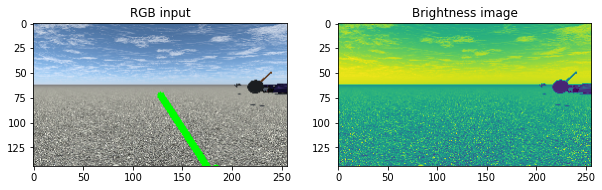

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Lx: 0.5588450188933923, Ly: -0.8028140048118926, Lz: 0.20780259511357047


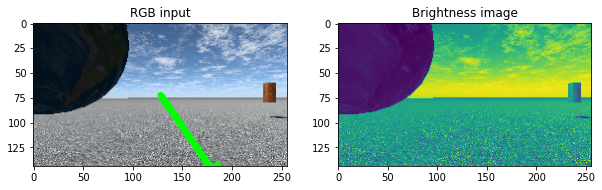

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Lx: 0.5521721795181471, Ly: -0.04997916927067833, Lz: 0.8322307172925019


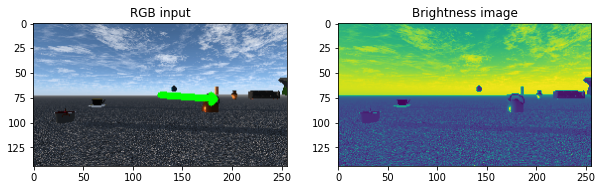

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Lx: 0.6243077740991017, Ly: -0.44573932286991647, Lz: 0.6415265070493139


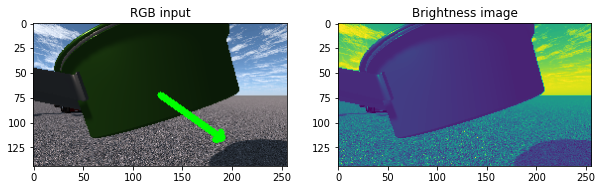

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Lx: 0.5738270327983658, Ly: -0.7726468611420324, Lz: -0.2715499298419871


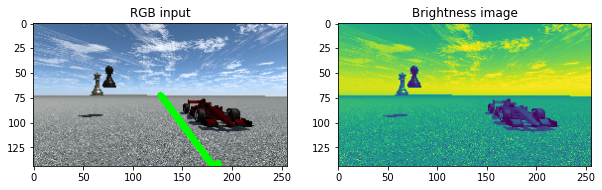

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Lx: 0.7934224605529482, Ly: -0.3221502968833604, Lz: -0.5164300391225012


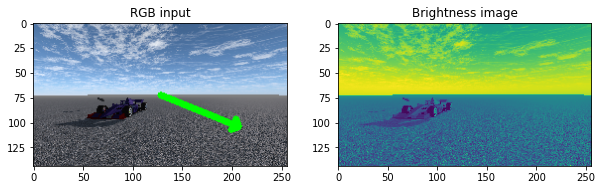

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Lx: 0.6895748323111067, Ly: -0.44036035495318304, Lz: -0.5749515705071303


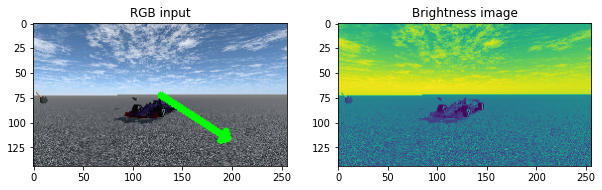

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Lx: 0.5503428539370824, Ly: -0.8293816651469472, Lz: -0.0961706641261467


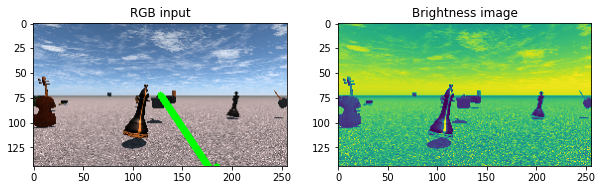

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


batch_img.shape: (8, 1080, 1920, 3)
batch_gt[L].shape: (8, 3)
batch_gt[L_img].shape: (8, 1080, 1920)
Lx: 0.5445149669207, Ly: -0.17312332416475054, Lz: -0.820689810726011


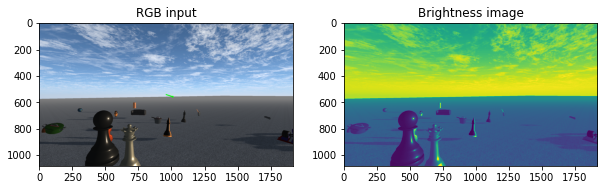

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Lx: 0.546748652682104, Ly: -0.8288225681229079, Lz: 0.1188236565691017


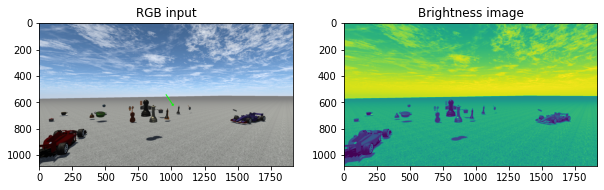

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Lx: 0.6125354627828384, Ly: -0.6373081098398594, Lz: 0.4675881520801822


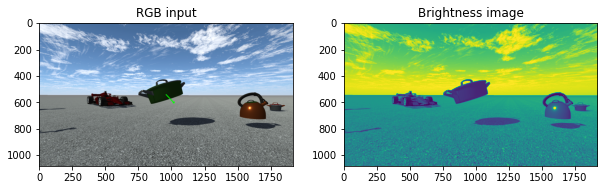

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Lx: 0.6164307313696197, Ly: -0.7745478895685606, Lz: 0.14173468237522058


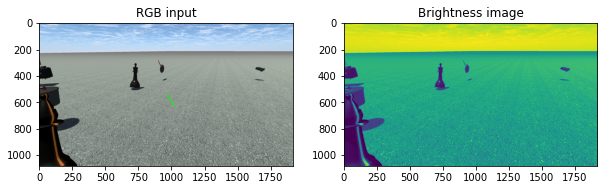

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Lx: 0.555668540921017, Ly: -0.8087360605531302, Lz: -0.19281715948460548


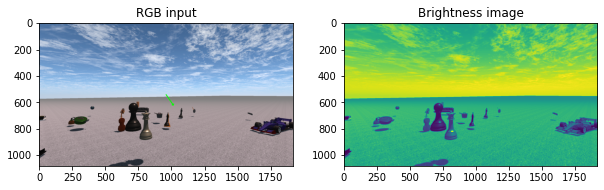

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Lx: 0.5646752727564491, Ly: -0.04698269807777454, Lz: 0.8239747947715164


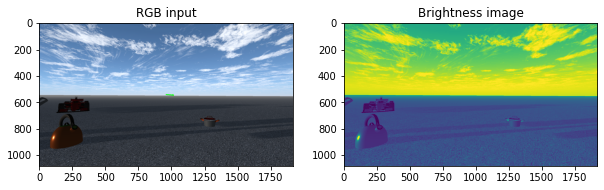

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Lx: 0.6007231813984827, Ly: -0.6548619957730966, Lz: -0.45857106954381943


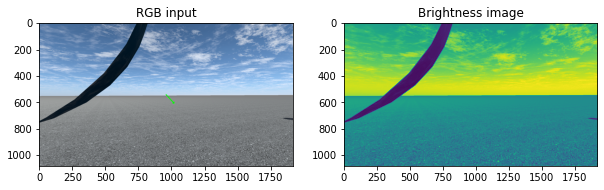

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Lx: 0.8294173918314421, Ly: -0.4546685149944326, Lz: -0.32456637472215993


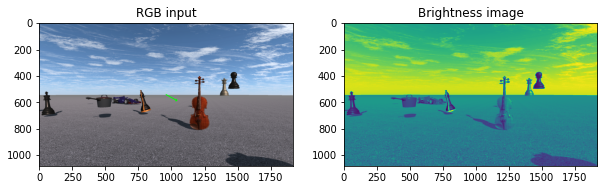

In [6]:

gt_path = os.path.join(dataset_path, "light.csv")
train_dir = os.path.join(dataset_path, "train")
val_dir = os.path.join(dataset_path, "val")

batch_size = 8

model_output_names = ['L', 'L_img']
img_size = (144,256)
train_loader = Data_loader(batch_size, train_dir, gt_path, img_size = img_size, model_output_names=model_output_names)
val_loader = Data_loader(batch_size, val_dir, gt_path, img_size = img_size, model_output_names=model_output_names)

train_loader.visualize_batch(img_size = img_size)
val_loader.visualize_batch()

### build model and callbacks

In [7]:
from keras.callbacks import ModelCheckpoint


model_path = "../models_phong_plus"
if(not os.path.exists(model_path)):
    os.makedirs(model_path)

pretrained_weights = None

# resume training with previous weights
# pretrained_weights = os.path.join(model_path, "best", "model_157-0.049.hdf5")

model = get_fusion_net(pretrained_weights_file = pretrained_weights)

losses = {model_output_names[0]: 'mean_absolute_error', model_output_names[1]: 'mean_squared_error'}

# define weight for each loss
lossWeights = {model_output_names[0]: 1.0, model_output_names[1]: 1.0}

# compile model
model.compile(loss=losses, loss_weights=lossWeights, optimizer='adam', metrics=["accuracy"])


model_file_name = os.path.join(model_path, 'model_{epoch:03d}-{val_loss:.3f}.hdf5')
checkpoint = ModelCheckpoint(model_file_name, monitor='val_loss', verbose=1, save_best_only=True, mode='min')


Model: "fusion_net"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 RGB_input (InputLayer)         [(None, 144, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 zero_padding2d_66 (ZeroPadding  (None, 150, 262, 3)  0          ['RGB_input[0][0]']              
 2D)                                                                                              
                                                                                                  
 conv2d_154 (Conv2D)            (None, 144, 256, 12  18944       ['zero_padding2d_66[0][0]']      
                                8)                                                       

### train model

In [8]:
N_epochs = 2
portion = 0.01

history = model.fit(
        train_loader,
        steps_per_epoch= int(portion * (train_loader.N_samples() // batch_size)),
        epochs=N_epochs,
        validation_data=val_loader,
        validation_steps=int(portion * (val_loader.N_samples() // batch_size)),
        callbacks = [checkpoint]
        # workers=50, # uncomment if hardware supports it
        # use_multiprocessing=True
        )


# save model architecture
model_json = model.to_json()
with open(os.path.join(model_path, "model.json"), "w") as json_file:
    json_file.write(model_json)
    

Epoch 1/2
34/34 [==============================] - ETA: 0s - loss: 0.6870 - L_loss: 0.3757 - L_img_loss: 0.3112 - L_accuracy: 0.8493 - L_img_accuracy: 0.0077
Epoch 00001: val_loss improved from inf to 0.65143, saving model to ../models_phong_plus\model_001-0.651.hdf5
34/34 [==============================] - 104s 2s/step - loss: 0.6870 - L_loss: 0.3757 - L_img_loss: 0.3112 - L_accuracy: 0.8493 - L_img_accuracy: 0.0077 - val_loss: 0.6514 - val_L_loss: 0.3576 - val_L_img_loss: 0.2938 - val_L_accuracy: 0.9375 - val_L_img_accuracy: 0.0315
Epoch 2/2
34/34 [==============================] - ETA: 0s - loss: 0.3686 - L_loss: 0.2933 - L_img_loss: 0.0754 - L_accuracy: 0.9265 - L_img_accuracy: 0.0173
Epoch 00002: val_loss improved from 0.65143 to 0.45951, saving model to ../models_phong_plus\model_002-0.460.hdf5
34/34 [==============================] - 52s 2s/step - loss: 0.3686 - L_loss: 0.2933 - L_img_loss: 0.0754 - L_accuracy: 0.9265 - L_img_accuracy: 0.0173 - val_loss: 0.4595 - val_L_loss: 0.3

### resume training

In [9]:
from keras.models import model_from_json

model_path = "../models_phong_plus"

# load model acrhitecture from json
json_file = open(os.path.join(model_path, 'model.json'), 'r')
loaded_model_json = json_file.read()
json_file.close()
model = model_from_json(loaded_model_json)



# load best model weights into new model
min_value = float('inf')
best_model_file_name = ''

# iterate over all files in the directory
for filename in os.listdir(model_path):
    # use regex to find the floating point number in the filename
    match = re.search(r'model_\d+-(\d+\.\d+)\.hdf5', filename)
    if match:
        # if a match is found, compare the number with the current minimum
        value = float(match.group(1))
        if value < min_value:
            min_value = value
            best_model_file_name = filename


model.load_weights(os.path.join(model_path, best_model_file_name))
model.summary()

# compile model
losses = {model_output_names[0]: 'mean_absolute_error', model_output_names[1]: 'mean_squared_error'}

# define weight for each loss
lossWeights = {model_output_names[0]: 1.0, model_output_names[1]: 1.0}


model.compile(loss=losses, loss_weights=lossWeights, optimizer='adam', metrics=["accuracy"])


Model: "fusion_net"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 RGB_input (InputLayer)         [(None, 144, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 zero_padding2d_66 (ZeroPadding  (None, 150, 262, 3)  0          ['RGB_input[0][0]']              
 2D)                                                                                              
                                                                                                  
 conv2d_154 (Conv2D)            (None, 144, 256, 12  18944       ['zero_padding2d_66[0][0]']      
                                8)                                                       

In [11]:
from keras.callbacks import ModelCheckpoint

model_file_name = os.path.join(model_path, 'model_{epoch:03d}-{val_loss:.3f}.hdf5')
checkpoint = ModelCheckpoint(model_file_name, monitor='val_loss', verbose=1, save_best_only=True, mode='min')

N_epochs = 1
portion = 0.01

history = model.fit(
        train_loader,
        steps_per_epoch= int(portion * (train_loader.N_samples() // batch_size)),
        epochs=N_epochs,
        validation_data=val_loader,
        validation_steps=int(portion * (val_loader.N_samples() // batch_size)),
        callbacks = [checkpoint])

34/34 [==============================] - ETA: 0s - loss: 0.2892 - L_loss: 0.2554 - L_img_loss: 0.0338 - L_accuracy: 0.9228 - L_img_accuracy: 0.0520
Epoch 00001: val_loss improved from inf to 35.40395, saving model to ../models_phong_plus\model_001-35.404.hdf5
34/34 [==============================] - 56s 2s/step - loss: 0.2892 - L_loss: 0.2554 - L_img_loss: 0.0338 - L_accuracy: 0.9228 - L_img_accuracy: 0.0520 - val_loss: 35.4039 - val_L_loss: 0.4075 - val_L_img_loss: 34.9964 - val_L_accuracy: 0.9375 - val_L_img_accuracy: 0.0184


## prediction on test set

In [12]:
import math
import re
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from PIL import Image
import cv2

def read_gt_light(light_gt_path):

    gt_light = {}
    with open(light_gt_path) as f:
        lines = f.readlines()

    for line in lines[2:]:
        tokens = line.split(";")
        name = tokens[0]
        theta = float(tokens[1])
        phi = float(tokens[2])
        Ly = math.sin(phi)
        Lx = math.cos(phi) * math.cos(theta)
        Lz = math.cos(phi) * math.sin(theta)
        
        gt_light[name] = [Lx,Ly,Lz]

    return gt_light



# preprocess input image for network
# img: PIL image
def preprocess_input(img, img_size=None):

    pil_img = Image.fromarray(img)

    if img_size != None:
        pil_img = pil_img.resize(img_size[::-1]) # resize method need size as (Width, Height)

    x = np.array(pil_img, dtype = np.float32)
    
    # ignore alpha channel
    if(x.shape[-1] == 4):
        x = x[...,:-1]
    generator_preprocess = ImageDataGenerator(rescale=1./255)
    x = generator_preprocess.standardize(x)
    return x


def evaluate(model, data_dir, img_size, gt_light_path, save_path = None):

    # read groundtruth light angles
    gt_light = read_gt_light(gt_light_path)

    # dictionary img_name -> [gt_angle_rad, model_angle_rad]
    predictions = {}

    cont = 0

    pixel_factor = 50

    if save_path and not os.path.exists(save_path):
        os.makedirs(save_path)

    regex_img = r".*\.(png|jpg)$"
    list_imgs = [f for f in os.listdir(data_dir) if re.search(regex_img,f)]

    print("found {} images".format(len(list_imgs)))

    for i, img_name in enumerate(list_imgs):

        print("processing img {} of {}".format(i+1, len(list_imgs)))

        #read image
        img = np.array(Image.open(os.path.join(data_dir, img_name)))
        
        # preprocess
        x = preprocess_input(img, img_size = img_size)

        # predict
        out = model.predict(np.expand_dims(x, axis = 0))
        L_hat = out[0][0]
        
        # groundtruth
        L = gt_light[img_name]

        predictions[img_name] = [L, L_hat] # per passsare da array di un elemento ad elemneto semplice

        if save_path:
            start = (int(img.shape[1] / 2), int(img.shape[0] / 2))
            end = (start[0] + int(pixel_factor * L[0]), start[1] - int(pixel_factor * L[1]))
            end_pred = (start[0] + int(pixel_factor * L_hat[0]), start[1] - int(pixel_factor * L_hat[1]))

            cv2.arrowedLine(img, start, end, (0, 255, 0), thickness = 2)
            cv2.arrowedLine(img, start, end_pred, (255, 255, 0), thickness = 2)

            Image.fromarray(img).save(os.path.join(save_path, img_name))
        
        cont+=1

    return predictions


In [14]:
dataset_path = "C:/Users/mar-z/progetti/data/SynthOutdoor/images"

gt_path = os.path.join(dataset_path, "light.csv")

test_dir = os.path.join(dataset_path, "test")

save_path = "../test_predictions_phong_plus_SynthOutdoor"
if not os.path.exists(save_path):
    os.makedirs(save_path)

predictions = evaluate(model, test_dir, img_size, gt_path, save_path=save_path)



found 7 images
processing img 1 of 7
processing img 2 of 7
processing img 3 of 7
processing img 4 of 7
processing img 5 of 7
processing img 6 of 7
processing img 7 of 7


### compute angular error distribution

In [15]:
gt_light_vectors = np.array([predictions[img_name][0] for img_name in predictions.keys()])
pred_light_vectors = np.array([predictions[img_name][1] for img_name in predictions.keys()])

print(pred_light_vectors.shape)
print(gt_light_vectors.shape)

(7, 3)
(7, 3)


In [16]:
angular_errors = []
for i in range(len(pred_light_vectors)):
    norm_prod = np.linalg.norm(pred_light_vectors[i]) * np.linalg.norm(gt_light_vectors[i])
    alpha = math.acos(np.dot(pred_light_vectors[i], gt_light_vectors[i]) / norm_prod)
    angular_errors.append(alpha)
angular_errors = np.array(angular_errors) * 180.0 / math.pi
print(angular_errors.shape)

(7,)


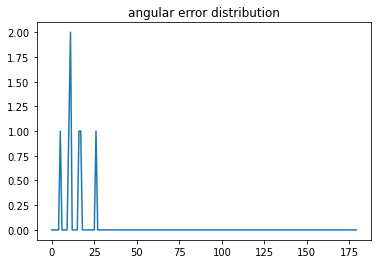

0.9238095238095239


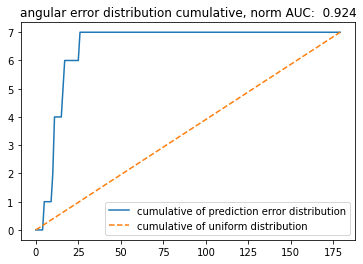

In [17]:
import matplotlib.pyplot as plt

plot_dir = os.path.join(save_path, "plots")
if not os.path.exists(plot_dir):
    os.makedirs(plot_dir)

plt.title("angular error distribution")
values, bins = np.histogram(angular_errors, bins=180, range = [0, 180])
plt.plot(bins[:-1],values)
plt.savefig(os.path.join(plot_dir,"angular_error_distribution.jpg"), bbox_inches="tight", dpi=600)
plt.show()
plt.close()

# cumulative distribution
values, bins = np.histogram(angular_errors, bins=180, range = [0, 180])
cumul = np.cumsum(values)
tot_sum = np.sum(cumul) / (len(angular_errors) * 180.0)
print(tot_sum)

plt.title("angular error distribution cumulative, norm AUC: {:6.3f}".format(tot_sum))

plt.plot(bins[:-1], cumul, label="cumulative of prediction error distribution")
plt.plot(bins[:-1], np.linspace(0, len(angular_errors), num=len(bins[:-1])), '--', label="cumulative of uniform distribution")
plt.legend()

plt.savefig(os.path.join(plot_dir,"angular_error_distribution_cumulative.jpg"), bbox_inches="tight", dpi=600)
plt.show()
plt.close()